### 67-364 Project 1: Netflix Data Analysis
#### Group 14: Sasha Volodin (svolodin) and Kieran Walsh (kawalsh)

In [4]:
#Importing needed modules
import pandas as pd

#Importing these just in case
import math
import matplotlib.pyplot as plt
import numpy as np

#CSV file with data
netflix_titles = './netflix_titles.csv'

#### Motivation/Problem Domain

Talk about this section

In [19]:
# Just get this stuff from the powerpoint

#### Dataset

Get stuff from the powerpoint and talk about cleaning

In [5]:
netflix = pd.read_csv(netflix_titles)
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


#### Assumptions/Hypothesis

Talk about this section

In [4]:
#Text and code

#### Question 1: Netflix's Content Strategy

Talk about this section

In [6]:
#Process of dropping null values from the dataset
netflix = netflix.dropna(subset=['date_added'])

##### Part (a): Focus on Genre

Talk about this section

In [7]:
#Text and code
def get_add_month(date):
    '''
    Extracts the year from a date (m d, y) and returns it as an int
    '''
    months = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']
    if isinstance(date, str): month, *_ = date.split()
    return months.index(month) + 1

#Isolating the month
netflix['add_month'] = netflix['date_added'].apply(get_add_month)

#Cleaning
netflix['listed_in'] = netflix['listed_in'].apply(lambda g: g.strip())

#Split 
netflix_genres = pd.DataFrame(netflix.listed_in.str.split(',').tolist(),
                              index=netflix.show_id).stack()

#Merge
yes = netflix[['show_id', 'add_month']]
yeah = pd.merge(netflix_genres.rename('genre'), yes, on='show_id')

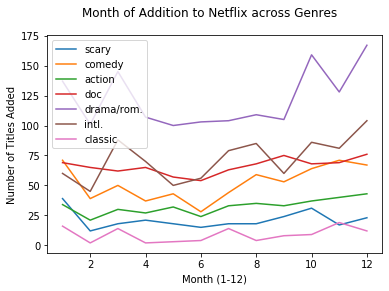

In [9]:
def get_genre_yvalues(genres):
    '''
    Returns a list of y-values used for the bar chart based on the
    given column
    '''
    freqDict = {i: 0 for i in range(1, 13)}
    #Get the list of the first digits from the dataframe
    for genre in genres:
        genre_data = yeah[yeah['genre'] == genre]
        cnts = genre_data['add_month'].tolist()
        #Count how many times each digit appears and store in the list
        for cnt in cnts: 
            if cnt in freqDict: freqDict[cnt] += 1
        cnt_list = [freqDict[x] for x in freqDict]
    return cnt_list

xvalues = np.arange(1, 13)
genres_dict = {'scary': ['Horror Movies', 'TV Horror', 'Thrillers', 
                            'TV Mysteries', 'TV Thrillers'],
               'action': ['Action & Adventure', 'TV Action & Adventure'],
               'comedy': ['Stand-Up Comedy', 'TV Stand-Up Comedy', 
                            'TV Comedies','Stand-Up Comedy & Talk Shows'],
               'doc': ['Documentaries', 'Docuseries'],
               'drama': ['Dramas', 'TV Dramas', 'Romantic Movies', 
                         'Romantic TV Shows', 'Crime TV Shows'],
               'intl': ['British TV Shows', 'International Movies', 
                      'International TV Shows', 'Spanish-Language TV Shows'],
               'classic': ['Classic & Cult TV', 'Classic Movies', 
                           'Cult Movies', 'Independent Movies']}

for genre in genres_dict:
    yvalues = get_genre_yvalues(genres_dict[genre])
    plt.plot(xvalues, yvalues)
    
plt.xlabel('Month (1-12)')
plt.ylabel('Number of Titles Added')
plt.suptitle('Month of Addition to Netflix across Genres')
plt.legend(['scary', 'comedy', 'action', 'doc', 'drama/rom.', 'intl.', 'classic'])

##### Part (b): Focus on New Content

Text(0.5, 0.98, 'Rate of Same-Year Addition of Titles')

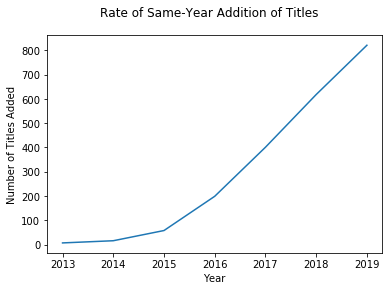

In [11]:
#Text and code
def get_add_year(date):
    '''
    Extracts the year from a date (m d, y) and returns it as an int
    '''
    if isinstance(date, str):
        _, year = date.split(', ')
    elif isinstance(date, float): year = 0
    return int(year)

#Data cleaning
netflix['add_year'] = netflix['date_added'].apply(get_add_year)
netflix['add_diff'] = netflix['add_year'] - netflix['release_year']

same_year = netflix[netflix['add_diff'] == 0]
originals = same_year[same_year['add_year'] >= 2013]

def get_years_yvalues(column):
    '''
    Returns a list of y-values used for the bar chart based on the
    given column
    '''
    freqDict = {i: 0 for i in range(2013, 2020)}
    #Get the list of the first digits from the dataframe
    cnts = originals[column].tolist()
    for cnt in cnts: 
        if cnt in freqDict: freqDict[cnt] += 1
    cnt_list = [freqDict[x] for x in freqDict]
    return cnt_list

xvalues = np.arange(2013, 2020)
years_yvalues = get_years_yvalues('add_year')
plt.plot(xvalues, years_yvalues)
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.suptitle('Rate of Same-Year Addition of Titles')

#### Question 2: Netflix's Subscriber Growth Strategy

In [13]:
#Text and code
netflix = pd.read_csv(netflix_titles)

# dropping NA values
netflix = netflix.dropna()

##### Part (a): Focus on international collaborators

In [14]:
# code reference for splitting a column into multiple rows:
# https://medium.com/@sureshssarda/pandas-splitting-exploding-a-column-into-multiple-rows-b1b1d59ea12e

# splitting the country column and creating a separate data frame
netflix_countries = pd.DataFrame(netflix.country.str.split(',').tolist(), index = netflix.show_id).stack()

netflix_countries = netflix_countries.reset_index([0, 'show_id'])

netflix_countries.columns = ['show_id', 'Country']

netflix_countries

,show_id,Country
0,81145628,United States
1,81145628,India
2,81145628,South Korea
3,81145628,China
4,80125979,United States
...,...,...
4793,80164216,Japan
4794,80115328,India
4795,80115328,United States
4796,80176842,South Korea


In [15]:
# stripping out whitespace in the date_added column
date_added = [d.strip() for d in netflix['date_added']]

netflix['date_added'] = date_added

month_added = [d.split(' ')[0] for d in netflix['date_added']]

netflix['month_added'] = month_added

month_added = [d.split(' ')[0] for d in netflix['date_added']]

day_added = [int(d.split(',')[0].split(' ')[1]) for d in netflix['date_added']]

netflix['day_added'] = day_added

year_added = [int(d.split(',')[1].strip()) for d in netflix['date_added']]

netflix['year_added'] = year_added

netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,day_added,year_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,September,9,2019
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,September,8,2017
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",September,8,2017
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,September,8,2017
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,September,8,2017


In [16]:
# filtering for US-only projects
netflix_us = netflix[netflix['country'] == 'United States']
us_years = [y for y in netflix_us.year_added]

# filtering for international projects
netflix_intl = netflix[netflix['country'] != 'United States']
intl_years = [y for y in netflix_intl.year_added]

In [17]:
from collections import Counter
y_counts_us = Counter(us_years)
y_counts_intl = Counter(intl_years)

y_us_dict = {k: y_counts_us[k] for k in sorted(y_counts_us.keys())}
y_intl_dict = {k: y_counts_intl[k] for k in sorted(y_counts_intl.keys())}

# use [:-1] to remove 2020 data
us_x = [k for k in y_us_dict][:-1]
us_y = [y_us_dict[k] for k in y_us_dict][:-1]
intl_x = [k for k in y_intl_dict][:-1]
intl_y = [y_intl_dict[k] for k in y_intl_dict][:-1]

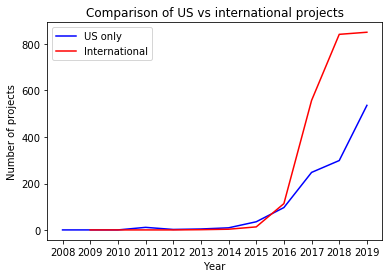

In [18]:
fig = plt.figure()
ax = fig.gca()
plt.xticks(np.arange(min(us_x), max(us_x)+1, 1.0))
ax.plot(us_x, us_y, color= 'blue')
ax.plot(intl_x, intl_y, color= 'red')
plt.xlabel('Year')
plt.ylabel('Number of projects')
plt.title("Comparison of US vs international projects")
ax.legend(['US only','International'])
plt.savefig('intl_projects.png')

#### **We can either put findings after each section or in the findings section, whichever seems better **

##### Part (b): Focus on market expansion

In [12]:
# data inputted to Tableau
# netflix_countries.to_csv('countries.csv')

#### Outcomes and Key Findings

Talk about this section

In [7]:
#Text and code